> # CAR PRICE PREDICTION

In [2]:
# IMPORTING THE DEPENDENCIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("car data.csv") # READING THE CSV FILE USING PANDAS.

In [4]:
df.head()  # DISPLAYING THE FIRST FIVE RECORDS.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape # DISPLAYING THE NUMBER OF ROWS AND COLUMNS

(301, 9)

In [6]:
# CHECKING FOR UNIQUE VALUES FOR COLUMNS HAVING CATEGORICAL DATA.

print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
# CHECKING FOR NULL VALUES 

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# GETTING OUR COLUMN VALUES

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
# CREATING NEW DATASET USING ONLY THE FEATURES WE WILL BE NEEDING

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head() # FIRST FIVE RECORDS.

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# ADDING A NEW COLUMN NAMED 'CURRENT YEAR' 
# WE DO SO BECAUSE WE CAN GET THE VALUE OF HOW OLD THE CAR FROM THE CURRENT YEAR. 

final_dataset['Current Year'] = 2022
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [12]:
# WE MAKE A NEW COLUMN AND THE VALUE OF IT IS GIVEN BY : (PRESENT YEAR - LISTED YEAR)

final_dataset['Number Of Years'] = final_dataset['Current Year'] - final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Number Of Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [14]:
# WE WILL DROP OUR "YEAR" AND "CURRENT YEAR" COLUMNS BECAUSE WE HAVE A DERIVED A NEW COLUMN FROM THESE TWO COLUMNS.

final_dataset.drop(['Year'],axis = 1, inplace = True)

In [15]:
final_dataset.drop(['Current Year'], axis = 1 , inplace = True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number Of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
# ONE HOT ENCODING

final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number Of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [19]:
# FINDING OUT THE CORRELATION 

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number Of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number Of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


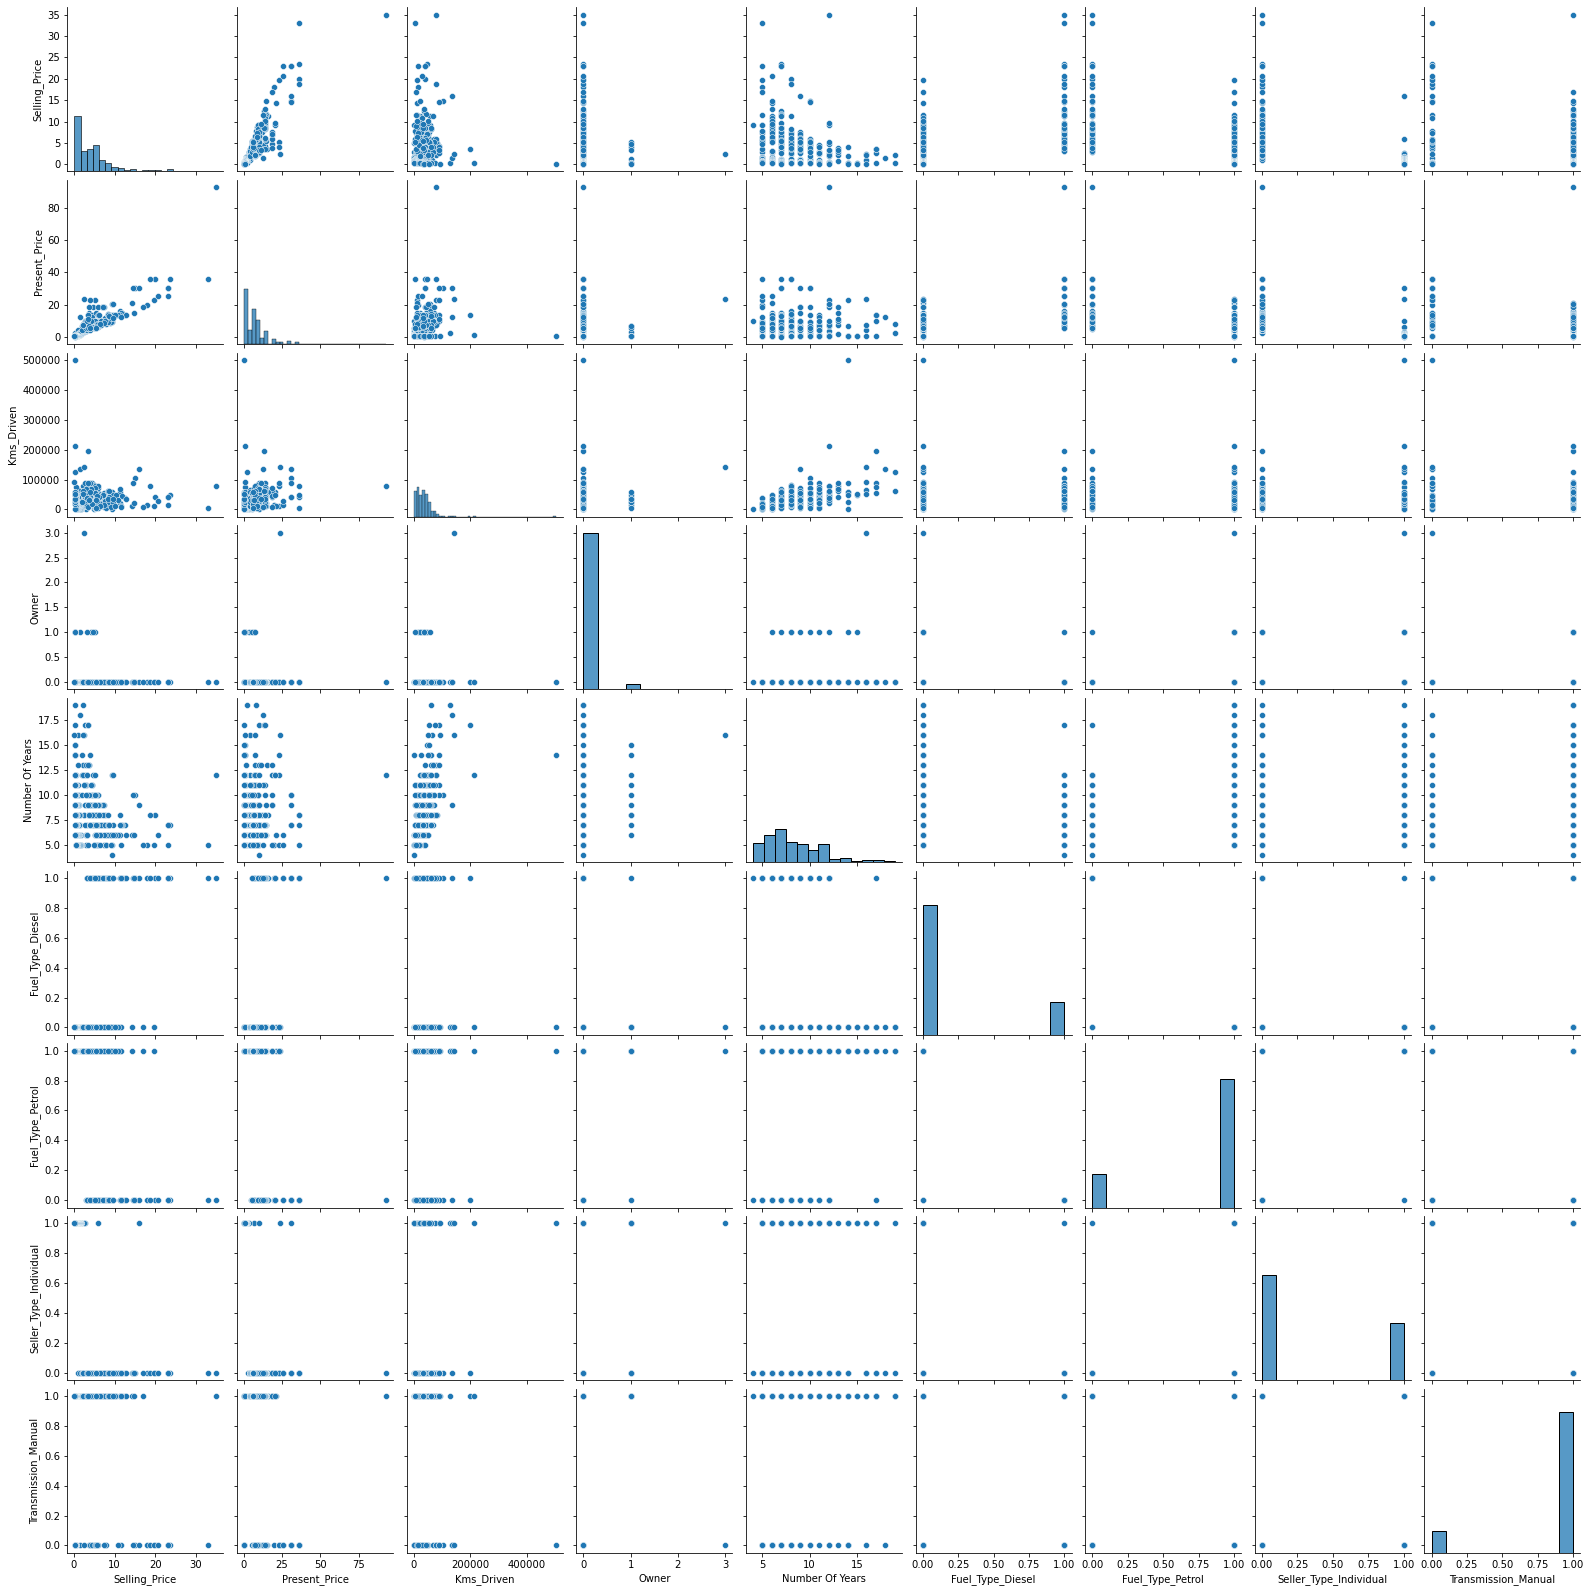

In [20]:
# VISUALIZING THE RELATION BETWEEN THE FEATURES(COLUMN VALUES).

sns.pairplot(final_dataset)

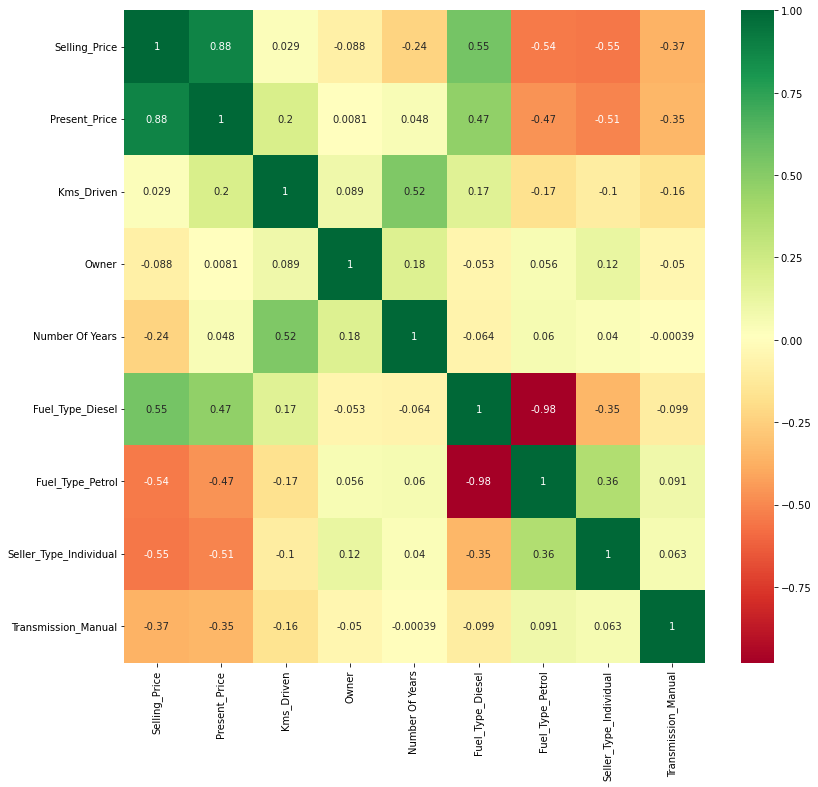

In [21]:
# PLOTTING OF HEAT MAP(TO GET INSIGHTS ABOUT OUR DATA MORE CLEARLY) 

plt.figure(figsize = (13,12))

corr_data = final_dataset.corr()

top_corr_features = corr_data.index

g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [22]:
# DIVIDING THE DATA INTO PREDICTORS AND TARGET VALUE(VALUE TO BE PREDICTED) 

X = final_dataset.iloc[:,1:] # INDEPENDENT FEATURES
y = final_dataset.iloc[:,0]  # DEPENDENT FEATURES

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,Number Of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
# FEATURE IMPORTANCE

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.37179374 0.04148904 0.00054734 0.0778263  0.22477205 0.01332181
 0.13136245 0.13888727]


<AxesSubplot:>

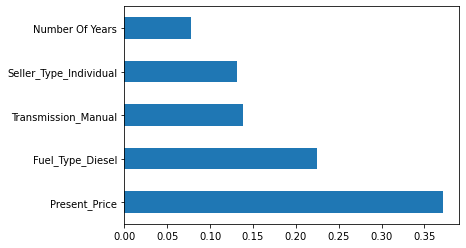

In [27]:
# PLOTTING FEATURE IMPORTANCE

feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')

#### `WE'LL BE USING ALL THE FEATURES , THE ABOVE CODE WAS JUST TO SHOW HOW WE CAN GET TO KNOW ABOUT FEATURE IMPORTANCE`

In [119]:
# TRAIN & TEST SPLIT 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 17)

In [120]:
# MODEL SELECTION 

from sklearn.ensemble import RandomForestRegressor

In [121]:
# HYPER PARAMETER TUNING


# NUMBER OF TREES IN RANDOM FOREST
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

# NUMBER OF FEATURES TO CONSIDER AT EVERY SPLIT
max_features = ['auto','sqrt']
print(max_features)

# MAXIMUM NUMBER OF LEVELS IN TREE
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
print(max_depth)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10, 15]


In [122]:
# RANDOMIZED SEARCH CV

from sklearn.model_selection import RandomizedSearchCV

In [123]:
# KEY VALUE PAIRS

random_grid = {'n_estimators' : n_estimators, 
               'max_features' : max_features,
               'max_depth' : max_depth , 
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 15]}


In [124]:
# USE THE RANDOM GRID TO SEARCH FOR BEST HYPERPARAMETER
# FIRSTLY , WE CREATE THE BASE MODEL 

rf = RandomForestRegressor()

In [125]:
rf_random = RandomizedSearchCV(estimator = rf , param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [126]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [127]:
# MAKING PREDICTIONS ON TEST DATA.

predictions = rf_random.predict(X_test)

In [128]:
predictions

array([ 0.3869673 ,  8.05333095,  1.00334565,  1.03468445,  8.72826763,
        4.17990538,  3.75844629,  8.12810223,  7.29374278,  4.55829847,
        5.19311304,  5.18865099,  5.2802823 ,  0.45695236,  7.34646719,
        1.88128479,  1.20021158,  7.74714   ,  0.63154554,  6.67182038,
        3.10901818,  5.88997741,  5.43441049,  0.89213479,  8.97951289,
        0.70308557, 18.6864733 , 18.04472482,  1.14913086,  8.10475322,
        4.31613122,  0.50565786,  6.93658049,  0.64042834,  4.75901908,
        5.85584724,  2.09508407,  0.57659174,  4.39234836,  0.72097011,
        3.92916956,  2.43472207,  8.31583494,  0.68715227,  6.19718015,
        0.59757291,  1.2169631 , 11.32572592,  4.27486176,  1.16183102,
        6.26733498,  5.31922842,  7.07721301,  0.64680497,  0.75825035,
        1.1806238 ,  1.32478878,  8.16265019, 10.6304254 ,  1.53765724,
        1.53383215,  0.54672628,  3.03224038,  0.44520159,  2.55817036,
        2.09681826,  3.20494949,  7.38964947,  4.03598709,  5.19

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

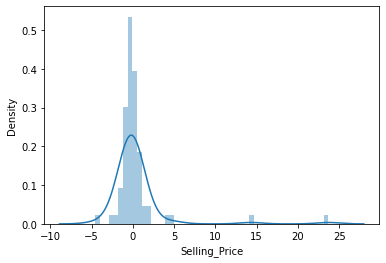

In [129]:
sns.distplot(y_test-predictions)

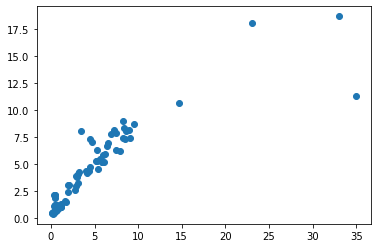

In [130]:
plt.scatter(y_test, predictions)

In [138]:
# SAVING OUR MODEL AS PICKLE FILE 

import pickle

# open a file where you want to store your data.
file = open('random_forest_regression_model.pkl', 'wb')

#dump imformation to that file.
pickle.dump(rf_random,file)